<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

## **Proyek Akhir kelompok AWS**

## **Chess Game**
</center>

## Description

Lots of information is contained within a single chess game, let alone a full dataset of multiple games. It is primarily a game of patterns, and data science is all about detecting patterns in data, which is why chess has been one of the most invested in areas of AI in the past. This dataset collects all of the information available from 20,000 games and presents it in a format that is easy to process for analysis of, for example, what allows a player to win as black or white, how much meta (out-of-game) factors affect a game, the relationship between openings and victory for black and white and more.

## Kelompok AWS
- Kenta
- Fadhil
- Irfan
- William

# Dataset Permainan Catur

Daftar Atribut

*   Game ID;
*   Rated (T/F);
*   Start Time;
*   End Time;
*   Number of Turns;
*   Game Status;
*   Winner;
*   Time Increment;
*   White Player ID;
*   White Player Rating;
*   Black Player ID;
*   Black Player Rating;
*   All Moves in Standard Chess Notation;
*   Opening Eco (Standardised Code for any given opening, [list here](https://www.365chess.com/eco.php));
*   Opening Name;
*   Opening Ply (Number of moves in the opening phase)

# Impor dan Validasi Data

## Impor dan Preview Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pre = '/content/drive/Shareddrives/AWS/'

import pandas as pd

data_raw = pd.read_csv(pre+"games.csv")
display(data_raw.head())

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [ ]:
display(data_raw.describe())

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000


## Validasi Data

In [ ]:
data = data_raw.copy()
print("Duplicated data:")
display(data.duplicated().sum())

data.drop_duplicates(inplace=True)
print("Duplicated data after drop:")
display(data.duplicated().sum())

Duplicated data:


429

Duplicated data after drop:


0

In [ ]:
print("Null Data Count:")
display(data.isnull().sum())

Null Data Count:


id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

### Validasi Permainan Catur

In [ ]:
!pip install chess

In [ ]:
# Library Chess untuk validasi dan Menampilkan papan catur
# https://python-chess.readthedocs.io/en/latest/

import chess

for datamoves in data['moves']:
  # Check if the moves are valid
  move_list = datamoves.split(" ")
  board = chess.Board()
  try:
    for move in move_list:
        board.push_san(move)
  except ValueError:
    print("Ilegal moves detected, removing from data")
    data_raw.drop(data[data['moves']] == datamoves)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19629 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              19629 non-null  object 
 1   rated           19629 non-null  bool   
 2   created_at      19629 non-null  float64
 3   last_move_at    19629 non-null  float64
 4   turns           19629 non-null  int64  
 5   victory_status  19629 non-null  object 
 6   winner          19629 non-null  object 
 7   increment_code  19629 non-null  object 
 8   white_id        19629 non-null  object 
 9   white_rating    19629 non-null  int64  
 10  black_id        19629 non-null  object 
 11  black_rating    19629 non-null  int64  
 12  moves           19629 non-null  object 
 13  opening_eco     19629 non-null  object 
 14  opening_name    19629 non-null  object 
 15  opening_ply     19629 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.4+ MB


# Eksplorasi dan Pre-processing

## Preprocessing Data

Mengubah data kategorikal menjadi binary (kecuali `winner` karena akan dijadikan variabel target)

In [ ]:
import numpy as np
## Rated = 1, Not rated = 0
data['rated_bin'] = np.where(data['rated'] == True, 1, 0)

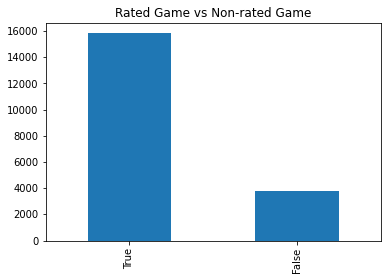

In [ ]:
ax = data.rated.value_counts().plot(kind="bar")
ax.set_title('Rated Game vs Non-rated Game')
ax

Mengubah data waktu menjadi durasi agar dapat mempermudah eksplorasi data.

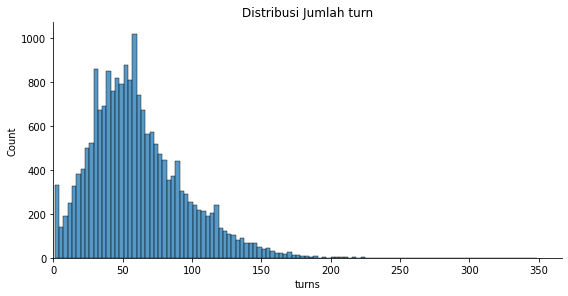

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.displot(data['turns'], height=4, aspect=2)
plt.title("Distribusi Jumlah turn")
plt.xlim((0))
plt.ylim((0))
plt.show()

Perbedaan rating dapat menjadi sebuah faktor dari hasil permainan karena rating biasanya mewakili kemampuan seorang pemain.

In [ ]:
data['rating_distance'] = data['white_rating'] - data['black_rating']
data['rating_distance'] = data['rating_distance'].apply(abs)

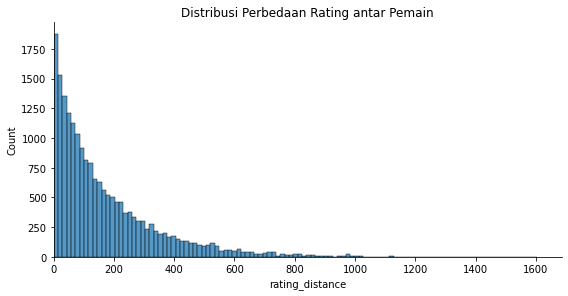

In [ ]:
sns.displot(data['rating_distance'], height=4, aspect=2)
plt.title("Distribusi Perbedaan Rating antar Pemain")
plt.xlim((0))
plt.ylim((0))
plt.show()

Dilakukan one hot encoding pada victory status yang menentukan apakah permainan diakhiri oleh draw, mate, out of time, atau salah satu pemain resign.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

encoder = OneHotEncoder(handle_unknown='error')
column_trans = make_column_transformer((encoder,['victory_status']),
                                       remainder='passthrough')
column_trans.fit(pd.DataFrame(data['victory_status']))
hot_victory = column_trans.transform(pd.DataFrame(data['victory_status'])).toarray()
VICTORY_STATUS = pd.DataFrame(hot_victory, columns = column_trans.get_feature_names())
VICTORY_STATUS.columns = ['victory_status_draw', 'victory_status_mate', 'victory_status_outoftime', 'victory_status_resign']
data = data.merge(VICTORY_STATUS, left_index=True, right_index=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



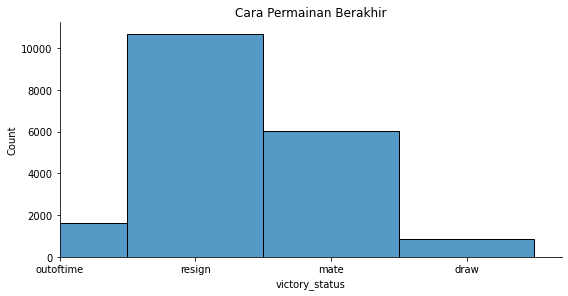

In [ ]:
sns.displot(data['victory_status'], height=4, aspect=2)
plt.title("Cara Permainan Berakhir")
plt.xlim((0))
plt.ylim((0))
plt.show()

# Eksplorasi Data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
created_at,19219.0,1.483341e+12,2.826687e+10,1.376772e+12,1.476874e+12,1.495400e+12,1.503080e+12,1.504493e+12
last_move_at,19219.0,1.483342e+12,2.826675e+10,1.376772e+12,1.476875e+12,1.495401e+12,1.503080e+12,1.504494e+12
turns,19219.0,6.033498e+01,3.351347e+01,1.000000e+00,3.700000e+01,5.500000e+01,7.900000e+01,3.490000e+02
white_rating,19219.0,1.595069e+03,2.904747e+02,7.840000e+02,1.398000e+03,1.564000e+03,1.788000e+03,2.700000e+03
black_rating,19219.0,1.586920e+03,2.903625e+02,7.890000e+02,1.390000e+03,1.559000e+03,1.778000e+03,2.723000e+03
opening_ply,19219.0,4.799625e+00,2.788270e+00,1.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00,2.800000e+01
rated_bin,19219.0,8.074301e-01,3.943283e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
rating_distance,19219.0,1.730358e+02,1.791828e+02,0.000000e+00,4.500000e+01,1.150000e+02,2.410000e+02,1.605000e+03
victory_status_draw,19219.0,4.464332e-02,2.065249e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
victory_status_mate,19219.0,3.152609e-01,4.646318e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


# Opening terbaik ketika seseorang bermain sebagai hitam dan putih.

In [ ]:
data[data['winner'] == "white"].opening_eco.value_counts()

C00    405
A00    388
C41    378
B00    357
B01    350
      ... 
B73      1
C89      1
E87      1
E18      1
B91      1
Name: opening_eco, Length: 324, dtype: int64

In [ ]:
data[data['winner'] == "black"].opening_eco.value_counts()

A00    552
C00    377
C20    343
D00    340
B01    325
      ... 
A36      1
D22      1
C29      1
E21      1
D59      1
Name: opening_eco, Length: 316, dtype: int64

In [ ]:
import plotly.express as px

black = data[data['winner'] == "black"].opening_eco.value_counts().to_frame()
draw = data[data['winner'] == "draw"].opening_eco.value_counts().to_frame()
white = data[data['winner'] == "white"].opening_eco.value_counts().to_frame()

black["type"] = "black"
draw["type"] = "draw"
white["type"] = "white"

df_all = black.append(draw).append(white)
display(df_all)

fig = px.bar(df_all, x=df_all.index, y="opening_eco", color="type", color_discrete_sequence=["black","gray","white"], title="Opening terbaik")
fig.show()

,opening_eco,type
A00,552,black
C00,377,black
C20,343,black
D00,340,black
B01,325,black
...,...,...
B73,1,white
C89,1,white
E87,1,white
E18,1,white


In [ ]:
df_all.index.unique()

Index(['A00', 'C00', 'C20', 'D00', 'B01', 'B20', 'C41', 'C50', 'A40', 'B00',
       ...
       'E63', 'D86', 'E95', 'D13', 'D81', 'D95', 'A67', 'B74', 'A23', 'E18'],
      dtype='object', length=364)

In [ ]:
df_transformed = pd.DataFrame(columns=["black", "draw", "white"])
df_transformed["black"] = black["opening_eco"]
df_transformed["white"] = white["opening_eco"]
df_transformed["draw"] = draw["opening_eco"]
df_transformed

,black,draw,white
A00,552,37.0,388.0
C00,377,37.0,405.0
C20,343,20.0,290.0
D00,340,35.0,328.0
B01,325,26.0,350.0
...,...,...,...
A36,1,1.0,6.0
D22,1,NaN,NaN
C29,1,NaN,1.0
E21,1,NaN,6.0


In [ ]:
df_transformed.fillna(0, inplace=True)
df_transformed

,black,draw,white
A00,552,37.0,388.0
C00,377,37.0,405.0
C20,343,20.0,290.0
D00,340,35.0,328.0
B01,325,26.0,350.0
...,...,...,...
A36,1,1.0,6.0
D22,1,0.0,0.0
C29,1,0.0,1.0
E21,1,0.0,6.0


In [ ]:
df_transformed["sum"] = df_transformed["black"] + df_transformed["draw"] + df_transformed["white"]
df_transformed["black"] = df_transformed["black"] / df_transformed["sum"]
df_transformed["white"] = df_transformed["white"] / df_transformed["sum"]
df_transformed["draw"] = df_transformed["draw"] / df_transformed["sum"]
df_transformed

,black,draw,white,sum
A00,0.564995,0.037871,0.397134,977.0
C00,0.460317,0.045177,0.494505,819.0
C20,0.525268,0.030628,0.444104,653.0
D00,0.483642,0.049787,0.466572,703.0
B01,0.463623,0.037090,0.499287,701.0
...,...,...,...,...
A36,0.125000,0.125000,0.750000,8.0
D22,1.000000,0.000000,0.000000,1.0
C29,0.500000,0.000000,0.500000,2.0
E21,0.142857,0.000000,0.857143,7.0


In [ ]:
_1 = df_transformed["black"].to_frame()
_2 = df_transformed["draw"].to_frame()
_3 = df_transformed["white"].to_frame()

_1["type"] = "black"
_2["type"] = "draw"
_3["type"] = "white"

_1.rename(columns={"black":"percentage"}, inplace=True)
_2.rename(columns={"draw":"percentage"}, inplace=True)
_3.rename(columns={"white":"percentage"}, inplace=True)

_ = _1.append(_2).append(_3)

fig = px.bar(_, x="percentage", y=_.index, color="type", color_discrete_sequence=["black","gray","white"], title="Opening terbaik", orientation="h")
fig.update_layout(height=5000)
fig.show()

# Langkah Pembuka Terburuk dalam Catur

"1. f3" disebut sebagai opening terburuk dalam catur. Secara teori, alasannya adalah sebagai berikut:
- Tidak membuka jalan untuk pion apapun (Selain pion Raja)
- Menghalangi gerakan "Nf3"
- Membuat Raja rawan terkena serangan dalam pembukaan.

Sumber: https://www.chess.com/forum/view/general/worst-first-move-for-white

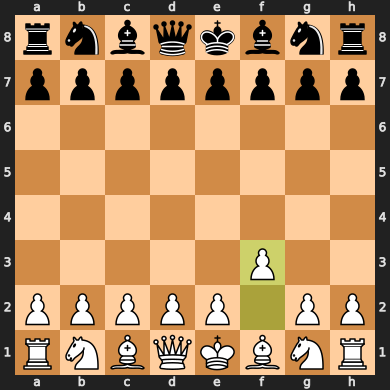

In [ ]:
board = chess.Board()
board.push_san("f3")
board

Ini adalah skakmat tercepat jika memainkan "1.f3".

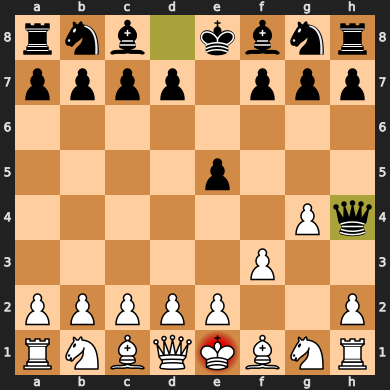

In [ ]:
board = chess.Board()
board.push_san("f3")
board.push_san("e5")
board.push_san("g4")
board.push_san("Qh4")
board

Kami mencoba melihat data permainan yang dimulai dengan "f3" dan menghitung jumlah kemenangan white vs black.

In [ ]:
f3_data = data[data['moves'].str.startswith("f3")]

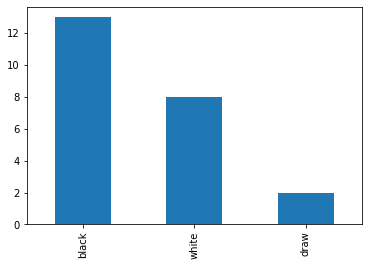

In [ ]:
# Insert win ratio of f3_data between white and black here
f3_data.winner.value_counts().plot(kind="bar")

Dapat dilihat bahwa lebih banyak pemain yang menang sebagai hitam saat lawannya membuka permainan dengan "1. f3". kemudian dilihat victory status pada saat white/black menang.

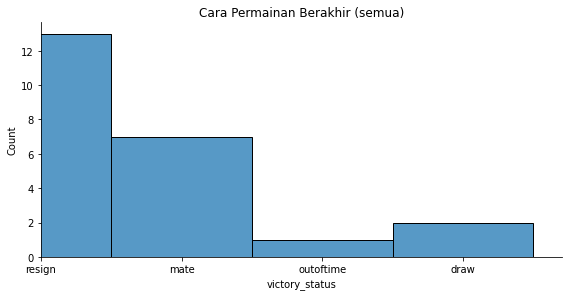

In [ ]:
sns.displot(f3_data['victory_status'], height=4, aspect=2)
plt.title("Cara Permainan Berakhir (semua)")
plt.xlim((0))
plt.ylim((0))
plt.show()

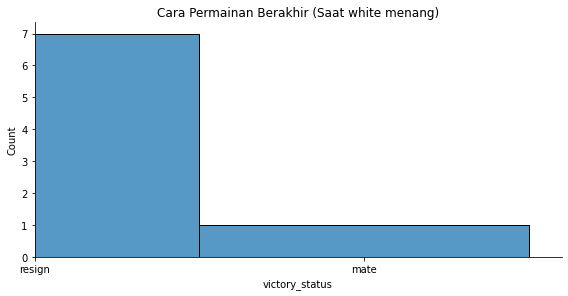

In [ ]:
sns.displot(f3_data[f3_data['winner'] == 'white']['victory_status'], height=4, aspect=2)
plt.title("Cara Permainan Berakhir (Saat white menang)")
plt.xlim((0))
plt.ylim((0))
plt.show()

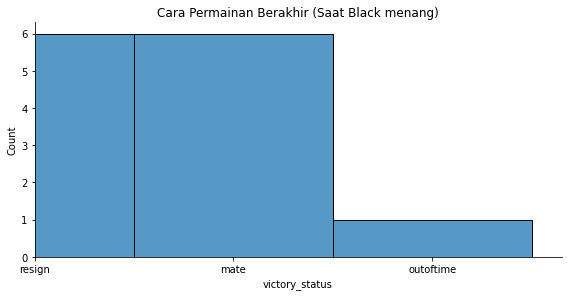

In [ ]:
sns.displot(f3_data[f3_data['winner'] == 'black']['victory_status'], height=4, aspect=2)
plt.title("Cara Permainan Berakhir (Saat Black menang)")
plt.xlim((0))
plt.ylim((0))
plt.show()

Dapat dilihat bahwa jumlah permainan yang dimenangi black karena mate sama dengan jumlah permainan yang dimenangi black karena resign, berbeda dengan jumlah pada saat permaina dimenangi white. Ini  menunjukan bahwa permainan yang di awali dengan "f3" cenderung lebih mengunggulkan black dibanding white.

# Prediksi Permainan

Kami menggunakan rating dengan opening yang digunakan sebagai prediktor dari permainan dengan `winner` permainan sebagai target variabel.

In [ ]:
data.winner.value_counts()

white    9591
black    8731
draw      897
Name: winner, dtype: int64

In [ ]:
opening_freq = data.opening_eco.value_counts().to_frame()

transform_dict = {}

x = 1
for index, row in opening_freq.iterrows():
  transform_dict[index] = x
  x += 1

print(transform_dict)

{'A00': 1, 'C00': 2, 'D00': 3, 'B01': 4, 'C41': 5, 'C20': 6, 'B00': 7, 'A40': 8, 'B20': 9, 'C50': 10, 'C40': 11, 'D02': 12, 'C44': 13, 'C42': 14, 'C55': 15, 'B07': 16, 'A04': 17, 'C45': 18, 'C02': 19, 'C46': 20, 'A45': 21, 'B21': 22, 'B50': 23, 'B30': 24, 'D20': 25, 'B10': 26, 'B06': 27, 'C21': 28, 'D06': 29, 'B12': 30, 'A01': 31, 'C23': 32, 'B02': 33, 'C01': 34, 'D30': 35, 'C62': 36, 'B40': 37, 'A10': 38, 'B32': 39, 'A06': 40, 'C57': 41, 'C24': 42, 'D10': 43, 'C60': 44, 'B23': 45, 'C65': 46, 'A20': 47, 'B90': 48, 'C68': 49, 'C30': 50, 'B22': 51, 'D01': 52, 'B13': 53, 'C53': 54, 'A02': 55, 'A43': 56, 'C48': 57, 'C22': 58, 'A46': 59, 'A03': 60, 'D31': 61, 'E20': 62, 'C34': 63, 'B54': 64, 'A41': 65, 'D35': 66, 'C70': 67, 'B27': 68, 'C26': 69, 'A21': 70, 'E61': 71, 'A22': 72, 'A15': 73, 'C10': 74, 'C64': 75, 'B25': 76, 'C47': 77, 'A80': 78, 'A13': 79, 'B33': 80, 'D07': 81, 'E00': 82, 'C77': 83, 'D15': 84, 'D04': 85, 'B08': 86, 'D11': 87, 'C11': 88, 'C61': 89, 'A30': 90, 'C27': 91, 'C54': 

Permainan yang diakhiri dengan draw di drop karena tidak proporsional dengan permainan yang dimenangi oleh black dan white. Selain itu, kita hanya memprediksi siapa yang akan memenangkan permainan.

In [ ]:
data_copy = data.drop(data[data['winner'] == 'draw'].index)
data_copy.winner.value_counts()

white    9591
black    8731
Name: winner, dtype: int64

In [ ]:
input_col = ["rated_bin", "white_rating", "black_rating", "rating_distance", "opening_ply"]
output_col = ["winner"]

x = pd.DataFrame.copy(data_copy[input_col])
y = pd.DataFrame.copy(data_copy[output_col])

opening_cat = data.opening_eco.map(transform_dict)
x.insert(5, "opening_cat", opening_cat)

x.head()

,rated_bin,white_rating,black_rating,rating_distance,opening_ply,opening_cat
0,0,1500,1191,309,5,43
1,1,1322,1261,61,4,7
2,1,1496,1500,4,3,6
3,1,1439,1454,15,3,12
4,1,1523,1469,54,5,5


In [ ]:
from sklearn.preprocessing import Normalizer

# Normalize data
scaler = Normalizer()

scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(scaled, index=x.index, columns=x.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# Split data
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.3, random_state=2021)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train data
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns

target_labels = ['white', 'black']

def evaluate_classifier_performance(classifier, prediction, y_test = y_test):
    # Informasi evaluasi secara compact
    print("Hasil Evaluasi:\n\n%s\n" % (classification_report(y_test, classifier.predict(x_test))))

    # Butuh informasi lebih lengkap? silakan disimak di bawah ini
    print('Accuracy:', accuracy_score(y_test, prediction))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro'))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro'))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro'))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro'))
    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))

    # Confusion Matrix
    print("\n\nConfusion Matrix\n")
    cm = confusion_matrix(y_test, prediction, labels=target_labels)
    ax = sns.heatmap(cm, annot=True, fmt='d')
    ax.set_title('Confusion Matrix')
    ax.set(xlabel='Predicted label', ylabel='True label')
    ax.xaxis.set_ticklabels(target_labels)
    ax.yaxis.set_ticklabels(target_labels);

Hasil Evaluasi:

              precision    recall  f1-score   support

       black       0.63      0.66      0.65      2626
       white       0.68      0.65      0.66      2871

    accuracy                           0.66      5497
   macro avg       0.66      0.66      0.66      5497
weighted avg       0.66      0.66      0.66      5497


Accuracy: 0.6552665090049118
Precision Macro Average: 0.6551607941149606
Precision Micro Average: 0.6552665090049118
Recall Macro Average: 0.655465878152802
Recall Micro Average: 0.6552665090049118
F1 Macro Average: 0.6550553664678787
F1 Micro Average: 0.6552665090049118


Confusion Matrix



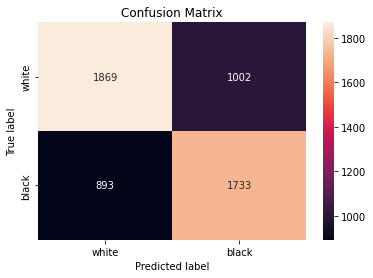

In [ ]:
evaluate_classifier_performance(gnb, y_pred)

In [ ]:
x_test[["white_rating", "black_rating", "rating_distance"]]

,white_rating,black_rating,rating_distance
7902,0.712183,0.701885,0.010298
15762,0.707596,0.706592,0.001004
10054,0.675614,0.734694,0.059080
12315,0.705907,0.708229,0.002322
8212,0.716709,0.696674,0.020035
...,...,...,...
2574,0.715980,0.697865,0.018115
19453,0.738804,0.670421,0.068383
5306,0.734132,0.676561,0.057570
10923,0.741558,0.666694,0.074864


In [ ]:
class PredictByRating:
  def predict(self, x_test):
    return pd.DataFrame(data=np.where(x_test["white_rating"] > x_test["black_rating"], "white", "black"))

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score, ConfusionMatrixDisplay

classifier = PredictByRating()

Hasil Evaluasi:

              precision    recall  f1-score   support

       black       0.64      0.66      0.65      2626
       white       0.68      0.66      0.67      2871

    accuracy                           0.66      5497
   macro avg       0.66      0.66      0.66      5497
weighted avg       0.66      0.66      0.66      5497


Accuracy: 0.655630343823904
Precision Macro Average: 0.6553684288292639
Precision Micro Average: 0.655630343823904
Recall Macro Average: 0.6556517057541298
Recall Micro Average: 0.655630343823904
F1 Macro Average: 0.6553456051088954
F1 Micro Average: 0.655630343823904


Confusion Matrix



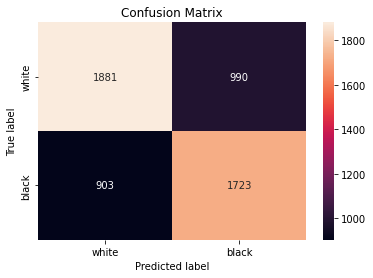

In [ ]:
evaluate_classifier_performance(classifier, classifier.predict(x_test))

Model yang kami buat memiliki hasil hampir sama dibandingkan dengan membandingkan ratingnya saja. Hal ini dikarenakan model kami didasari oleh rating kedua pemain, opening yang digunakan, dan jumlah langkah dalam opening. opening yang digunakan, dan jumlah langkah dalam opening mungkin tidak berpe

# Memprediksi Jumlah Langkah dalam Opening

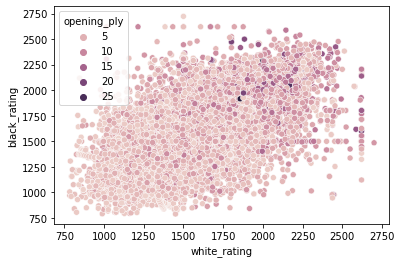

In [ ]:
# Distribusi rating antar pemain dengan opening_ply

sns.scatterplot(
    data=data,
    x='white_rating',
    y='black_rating',
    hue='opening_ply',
)

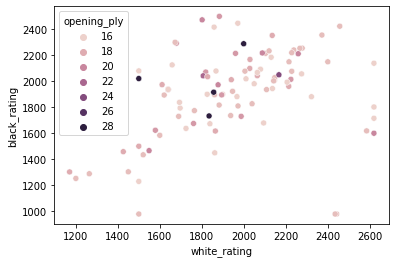

In [ ]:
sns.scatterplot(
    data=data[data['opening_ply'] > 15],
    x='white_rating',
    y='black_rating',
    hue='opening_ply',
)

In [ ]:
input_col = ["white_rating", "black_rating", "rating_distance", "opening_ply"]
output_col = ["opening_ply"]

x = pd.DataFrame.copy(data[input_col])
y = pd.DataFrame.copy(data[output_col])

x.head()

,white_rating,black_rating,rating_distance,opening_ply
0,1500,1191,309,5
1,1322,1261,61,4
2,1496,1500,4,3
3,1439,1454,15,3
4,1523,1469,54,5


In [ ]:
# Normalize data
scaler = Normalizer()

scaled = scaler.fit_transform(x)
x_norm = pd.DataFrame(scaled, index=x.index, columns=x.columns)

# Split
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size = 0.3, random_state=2021)

In [ ]:
# SoftMax Regression
from sklearn.linear_model import LogisticRegression

soft_max = LogisticRegression(multi_class='multinomial', max_iter=1000)
soft_max.fit(x_train, y_train)
y_pred = soft_max.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
reg = pd.DataFrame.copy(y_test)
reg = reg.rename(columns={"opening_ply": "actual"})
reg["prediction"] = y_pred
display(reg)

,actual,prediction
11823,5,3
11722,2,2
4428,13,3
7045,5,3
3420,6,3
...,...,...
19473,4,3
2307,2,3
8253,3,3
413,3,3


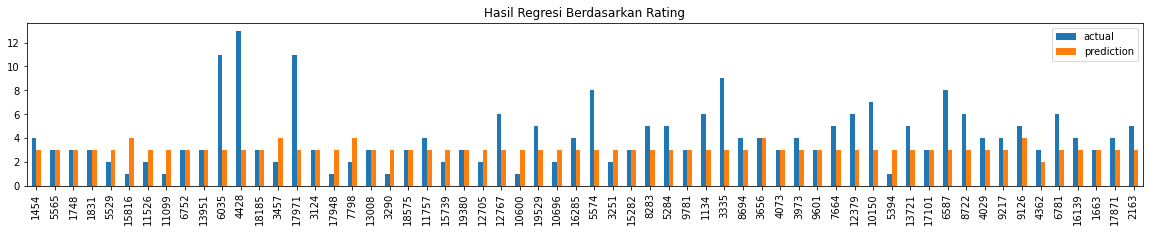

Mean Accuracy: 0.1732570239334027


In [ ]:
# Visualisasi
reg.sample(n=60).plot(kind='bar',figsize=(20,3))
plt.title("Hasil Regresi Berdasarkan Rating")
plt.show()

# Pengukuran dengan Mean Accuracy
print("Mean Accuracy:", soft_max.score(x_test, y_test))

In [ ]:
data_corr = data[data.select_dtypes(np.number).columns].drop(["created_at", "last_move_at"], axis=1)
data_corr["opening_eco"] = data.opening_eco.map(transform_dict)
data_corr

,turns,white_rating,black_rating,opening_ply,rated_bin,rating_distance,victory_status_draw,victory_status_mate,victory_status_outoftime,victory_status_resign,opening_eco
0,13,1500,1191,5,0,309,0.0,0.0,1.0,0.0,43
1,16,1322,1261,4,1,61,0.0,0.0,0.0,1.0,7
2,61,1496,1500,3,1,4,0.0,1.0,0.0,0.0,6
3,61,1439,1454,3,1,15,0.0,1.0,0.0,0.0,12
4,95,1523,1469,5,1,54,0.0,1.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...
19624,44,1784,1812,8,0,28,0.0,0.0,0.0,1.0,86
19625,62,1812,2012,2,0,200,0.0,1.0,0.0,0.0,56
19626,44,1624,1812,9,0,188,0.0,1.0,0.0,0.0,71
19627,85,1812,1897,5,0,85,0.0,0.0,0.0,1.0,59


Text(0.5, 1.0, 'Correlation matrix')

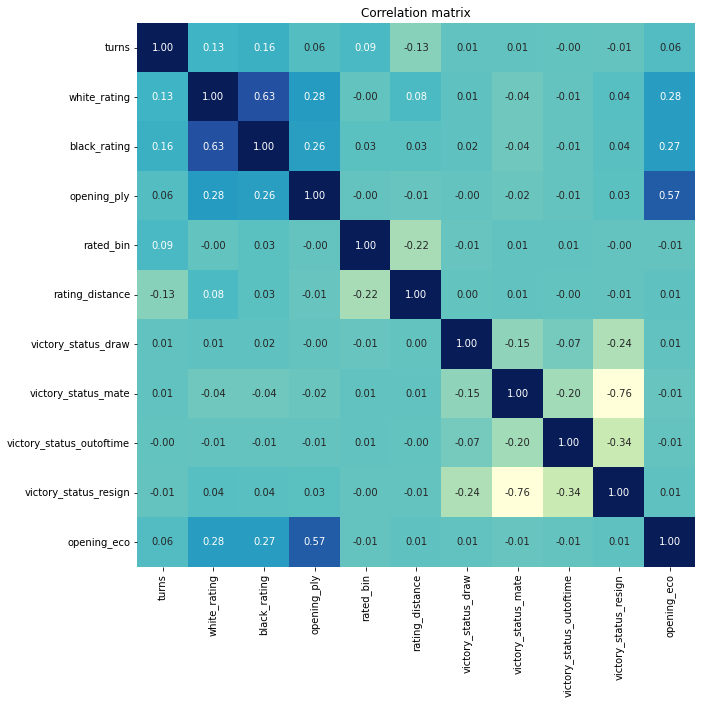

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(data_corr.corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=data_corr.columns,
        yticklabels=data_corr.columns)
plt.title("Correlation matrix")

In [ ]:
x_new = pd.DataFrame.copy(data[["opening_eco"]])
x_new["opening_eco"] = x_new.opening_eco.map(transform_dict)
y_new = pd.DataFrame.copy(data[["opening_ply"]])

x_new

,opening_eco
0,43
1,7
2,6
3,12
4,5
...,...
19624,86
19625,56
19626,71
19627,59


In [ ]:
# Split
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3, random_state=2021)

In [ ]:
# SoftMax Regression
from sklearn.linear_model import LogisticRegression

soft_max_new = LogisticRegression(multi_class='multinomial', max_iter=2000)
soft_max_new.fit(x_train, y_train)
y_pred = soft_max_new.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
reg_new = pd.DataFrame.copy(y_test)
reg_new = reg_new.rename(columns={"opening_ply": "actual"})
reg_new["prediction"] = y_pred
display(reg_new)

,actual,prediction
11823,5,3
11722,2,3
4428,13,8
7045,5,8
3420,6,4
...,...,...
19473,4,4
2307,2,3
8253,3,3
413,3,3


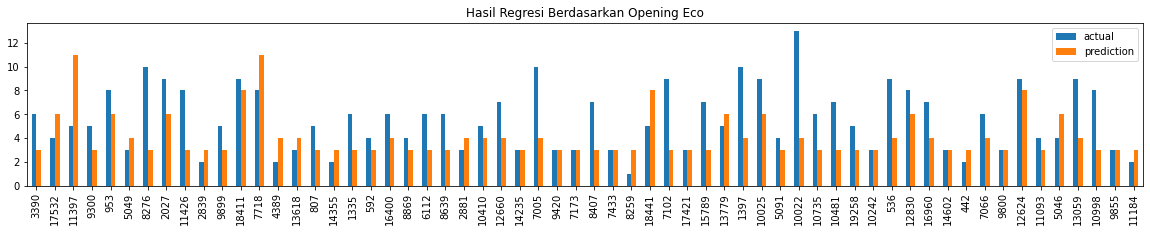

Mean Accuracy: 0.19719042663891778


In [ ]:
# Visualisasi
reg_new.sample(n=60).plot(kind='bar',figsize=(20,3))
plt.title("Hasil Regresi Berdasarkan Opening Eco")
plt.show()

# Pengukuran dengan Mean Accuracy
print("Mean Accuracy:", soft_max_new.score(x_test, y_test))

# Clustering Analysis

In [ ]:
df_cluster = data.copy()
df_cluster[df_cluster["victory_status"] == "draw"] = None
df_cluster[df_cluster["winner"] == "draw"] = None
df_cluster.dropna(inplace=True)
y = df_cluster["winner"]
cols_to_drop = ["id", "rated", "winner", "increment_code", "white_id", "black_id", "opening_name", "opening_eco", "moves", "created_at", "last_move_at", "victory_status", "victory_status_draw"]
df_cluster.drop(columns=cols_to_drop, inplace=True)
# df_cluster[df_cluster["game_len"] <= 0] = None
df_cluster

,turns,white_rating,black_rating,opening_ply,rated_bin,rating_distance,victory_status_mate,victory_status_outoftime,victory_status_resign
0,13.0,1500.0,1191.0,5.0,0.0,309.0,0.0,1.0,0.0
1,16.0,1322.0,1261.0,4.0,1.0,61.0,0.0,0.0,1.0
2,61.0,1496.0,1500.0,3.0,1.0,4.0,1.0,0.0,0.0
3,61.0,1439.0,1454.0,3.0,1.0,15.0,1.0,0.0,0.0
4,95.0,1523.0,1469.0,5.0,1.0,54.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
19623,47.0,1793.0,1730.0,7.0,1.0,63.0,0.0,0.0,1.0
19624,44.0,1784.0,1812.0,8.0,0.0,28.0,0.0,0.0,1.0
19625,62.0,1812.0,2012.0,2.0,0.0,200.0,1.0,0.0,0.0
19626,44.0,1624.0,1812.0,9.0,0.0,188.0,1.0,0.0,0.0


In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(df_cluster)
z

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 18322 samples in 0.023s...
[t-SNE] Computed neighbors for 18322 samples in 0.628s...
[t-SNE] Computed conditional probabilities for sample 1000 / 18322
[t-SNE] Computed conditional probabilities for sample 2000 / 18322
[t-SNE] Computed conditional probabilities for sample 3000 / 18322
[t-SNE] Computed conditional probabilities for sample 4000 / 18322
[t-SNE] Computed conditional probabilities for sample 5000 / 18322
[t-SNE] Computed conditional probabilities for sample 6000 / 18322
[t-SNE] Computed conditional probabilities for sample 7000 / 18322
[t-SNE] Computed conditional probabilities for sample 8000 / 18322
[t-SNE] Computed conditional probabilities for sample 9000 / 18322
[t-SNE] Computed conditional probabilities for sample 10000 / 18322
[t-SNE] Computed conditional probabilities for sample 11000 / 18322
[t-SNE] Computed conditional probabilities for sample 12000 / 18322
[t-SNE] Computed conditional probabilities for sam

array([[-47.03872 ,  73.19097 ],
       [ -9.096478,  66.30885 ],
       [-33.638706,  15.922729],
       ...,
       [ 54.458412, -29.301575],
       [ 35.15615 ,  -8.321423],
       [ 12.973905, -38.556072]], dtype=float32)

0        white
1        black
2        white
3        white
4        white
         ...  
19623    white
19624    black
19625    black
19626    black
19628    white
Name: winner, Length: 18322, dtype: object

[Text(0.5, 1.0, 'T-SNE projection')]

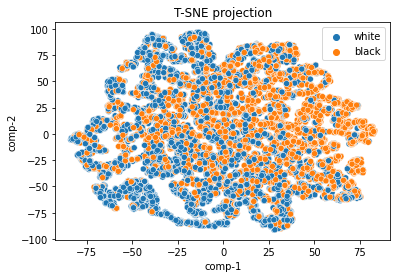

In [ ]:
import seaborn as sns

df_tsne = pd.DataFrame()
display(y)
df_tsne["y"] = y
df_tsne["comp-1"] = z[:,0]
df_tsne["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_tsne.y.tolist(),
                data=df_tsne).set(title="T-SNE projection") 

[Text(0.5, 1.0, 'PCA projection')]

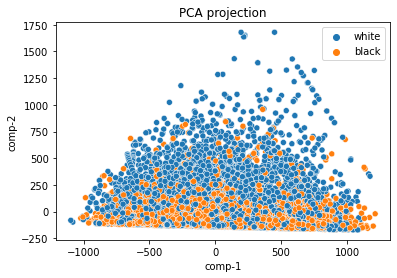

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
skl_pca = pca.fit_transform(df_cluster)
skl_pca.shape

df_pca = pd.DataFrame()
df_pca["y"] = y
df_pca["comp-1"] = skl_pca[:,0]
df_pca["comp-2"] = skl_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df_pca.y.tolist(),
                data=df_pca).set(title="PCA projection") 

In [ ]:
pca.components_
most_important = [np.abs(pca.components_[i]).argmax() for i in range(pca.components_.shape[0])]
initial_feature_names = df_cluster.columns
most_important_names = [initial_feature_names[most_important[i]] for i in range(pca.components_.shape[0])]
most_important_names

['black_rating', 'rating_distance']